In [1]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from pandas import get_dummies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from google.colab import files
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # –¥–ª—è —Å—Ç–∏–ª—å–Ω—ã—Ö –≥—Ä–∞—Ñ–∏–∫–æ–≤
import numpy as np

from ipywidgets import interactive
from sklearn.metrics import pairwise_distances_argmin
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

data = pd.read_csv("Fashion_Retail_Sales.csv")
data.head()

Customer Reference ID Item Purchased  Purchase Amount (USD) Date Purchase  \
0                   4018        Handbag                 4619.0    2023-02-05   
1                   4115          Tunic                 2456.0    2023-07-11   
2                   4019       Tank Top                 2102.0    2023-03-23   
3                   4097       Leggings                 3126.0    2023-03-15   
4                   3997         Wallet                 3003.0    2022-11-27   

   Review Rating Payment Method  
0            NaN    Credit Card  
1            2.0    Credit Card  
2            4.1           Cash  
3            3.2           Cash  
4            4.7           Cash

–£–¥–∞–ª–∏–º –ø–æ–≤—Ç–æ—Ä—è—é—â–∏–µ—Å—è –∑–Ω–∞—á–µ–Ω–∏—è

In [3]:
data.drop_duplicates(inplace=True) # –æ–ø–µ—Ä–∞—Ü–∏—è –∏–∑–º–µ–Ω—è–µ—Ç –∏—Å—Ö–æ–¥–Ω—ã–π DataFrame data, –∞ –Ω–µ —Å–æ–∑–¥–∞–µ—Ç –Ω–æ–≤—ã–π.
print(data.columns)

Index(['Customer Reference ID', 'Item Purchased', 'Purchase Amount (USD)',
       'Date Purchase', 'Review Rating', 'Payment Method'],
      dtype='object')


–ü–æ—Ä–∞–±–æ—Ç–∞–µ–º —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏:

–ö–æ–≥–¥–∞ —Ä–∞–±–æ—Ç–∞–µ–º —Å –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏ –≤ –≤–∏–¥–µ —Å—Ç—Ä–æ–∫, –∏—Å–ø–æ–ª—å–∑—É–µ–º –º–æ–¥—É. –î–ª—è —á–∏—Å–ª–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö –º–µ–¥–∏–∞–Ω–∞ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –∫–∞–∫ —Å—Ç–∞–±–∏–ª—å–Ω—ã–π –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å —Ü–µ–Ω—Ç—Ä–∞–ª—å–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –±–µ–∑ —É—á–µ—Ç–∞ –≤—ã–±—Ä–æ—Å–æ–≤.

In [4]:
if data.isnull().any().any():
  print("E—Å—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏ –≤ —Å–ª–µ–¥—É—é—â–∏—Ö —Å—Ç–æ–ª–±—Ü–∞—Ö: ", data.columns[data.isnull().any()].tolist())
  for column in data.columns:
      if data[column].isnull().sum() > len(data) / 2:
          data.drop(column, inplace=True)
          print(f"–°—Ç–æ–ª–±–µ—Ü {column} —É–¥–∞–ª–µ–Ω, —Ç–∞–∫ –∫–∞–∫ —Å–æ–¥–µ—Ä–∂–∏—Ç –±–æ–ª–µ–µ –ø–æ–ª–æ–≤–∏–Ω—ã –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π.")
      else:
          if data[column].dtype == 'object':
              # –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
              col_mode = data[column].mode()
              data[column] = data[column].fillna(col_mode)
              print(f"–í—Å–µ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è —Å—Ç–æ–ª–±—Ü–∞ {column} –∑–∞–º–µ–Ω–µ–Ω—ã –Ω–∞ –Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ {col_mode}, —Ç–∞–∫ –∫–∞–∫ —Å–µ—Ä–∏—è —Å–æ–¥–µ—Ä–∂–∏—Ç –º–µ–Ω–µ–µ –ø–æ–ª–æ–≤–∏–Ω—ã –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π.")
          else:
              # –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ —á–∏—Å–ª–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
              col_median = data[column].median()
              data[column] = data[column].fillna(col_median)
              print(f"–í—Å–µ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è —Å—Ç–æ–ª–±—Ü–∞ {column} –∑–∞–º–µ–Ω–µ–Ω—ã –Ω–∞ –º–µ–¥–∏–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ {col_median}, —Ç–∞–∫ –∫–∞–∫ —Å–µ—Ä–∏—è —Å–æ–¥–µ—Ä–∂–∏—Ç –º–µ–Ω–µ–µ –ø–æ–ª–æ–≤–∏–Ω—ã –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π.")
else:
  print("–ü—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –¥–∞–Ω–Ω—ã—Ö –Ω–µ—Ç :)")

E—Å—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏ –≤ —Å–ª–µ–¥—É—é—â–∏—Ö —Å—Ç–æ–ª–±—Ü–∞—Ö:  ['Purchase Amount (USD)', 'Review Rating']
–í—Å–µ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è —Å—Ç–æ–ª–±—Ü–∞ Customer Reference ID –∑–∞–º–µ–Ω–µ–Ω—ã –Ω–∞ –º–µ–¥–∏–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ 4040.0, —Ç–∞–∫ –∫–∞–∫ —Å–µ—Ä–∏—è —Å–æ–¥–µ—Ä–∂–∏—Ç –º–µ–Ω–µ–µ –ø–æ–ª–æ–≤–∏–Ω—ã –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π.
–í—Å–µ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è —Å—Ç–æ–ª–±—Ü–∞ Item Purchased –∑–∞–º–µ–Ω–µ–Ω—ã –Ω–∞ –Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ 0    Belt
Name: Item Purchased, dtype: object, —Ç–∞–∫ –∫–∞–∫ —Å–µ—Ä–∏—è —Å–æ–¥–µ—Ä–∂–∏—Ç –º–µ–Ω–µ–µ –ø–æ–ª–æ–≤–∏–Ω—ã –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π.
–í—Å–µ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è —Å—Ç–æ–ª–±—Ü–∞ Purchase Amount (USD) –∑–∞–º–µ–Ω–µ–Ω—ã –Ω–∞ –º–µ–¥–∏–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ 110.0, —Ç–∞–∫ –∫–∞–∫ —Å–µ—Ä–∏—è —Å–æ–¥–µ—Ä–∂–∏—Ç –º–µ–Ω–µ–µ –ø–æ–ª–æ–≤–∏–Ω—ã –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π.
–í—Å–µ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è —Å—Ç–æ–ª–±—Ü–∞ Date

–í—ã–≤–µ–¥–µ–º –≤—Å—é –Ω–µ–æ–±—Ö–æ–¥–∏–º—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–µ –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ –∏ —Ä–∞–±–æ—Ç—ã —Å –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏...

In [5]:
print(data.info(show_counts=True, memory_usage=False, verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Reference ID  3400 non-null   int64  
 1   Item Purchased         3400 non-null   object 
 2   Purchase Amount (USD)  3400 non-null   float64
 3   Date Purchase          3400 non-null   object 
 4   Review Rating          3400 non-null   float64
 5   Payment Method         3400 non-null   object 
dtypes: float64(2), int64(1), object(3)None


–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –Ω–µ—á–∏—Å–ª–æ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –ø—Ä–µ–¥—Å—Ç–∞–ª–µ–Ω–æ –≤ —Ç–∞–∫–∏—Ö —Å—Ç–æ–ª–±—Ü–∞—Ö –∫–∞–∫:
*   Payment Method
*   Date Purchase
*   Item Purchased

–ü–æ—Ä–∞–±–æ—Ç–∞–µ–º —Å–æ —Å—Ç–æ–ª–±—Ü–æ–º Date Purchase, –∫–æ—Ç–æ—Ä—ã–π —Å–æ–¥–µ—Ä–∂–∏—Ç –¥–∞—Ç—É –≤ –≤–∏–¥–µ: **–≥–æ–¥-–º–µ—Å—è—Ü-–¥–µ–Ω—å, –Ω–æ –±—É–¥—É—á–∏ —Ç–∏–ø–æ–º string**.
–ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º —Å—Ç–æ–ª–±–µ—Ü "Date Purchase" –≤ —Ñ–æ—Ä–º–∞—Ç –¥–∞—Ç—ã –∏ –≤—Ä–µ–º–µ–Ω–∏

In [6]:
df_copy = data.copy()

df_copy["Date Purchase"] = pd.to_datetime(df_copy["Date Purchase"], format="%Y-%m-%d")

–ó–∞–∫–æ–¥–∏—Ä—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ —Å –ø–æ–º–æ—â—å—é LabelEncoder

In [7]:
lbl_en = LabelEncoder()
for column in ["Payment Method", "Item Purchased", "Customer Reference ID"]:
    df_copy[column] = lbl_en.fit_transform(data[column])
print(df_copy)
print(df_copy.dtypes)

      Customer Reference ID  Item Purchased  Purchase Amount (USD)  \
0                        61              13                 4619.0   
1                       158              46                 2456.0   
2                        62              42                 2102.0   
3                       140              20                 3126.0   
4                        40              49                 3003.0   
...                     ...             ...                    ...   
3395                    161              32                   37.0   
3396                     99              34                  176.0   
3397                     34              22                  110.0   
3398                     85              30                  128.0   
3399                     44               0                  115.0   

     Date Purchase  Review Rating  Payment Method  
0       2023-02-05            3.0               1  
1       2023-07-11            2.0               1  
2  

-----------------------------------------------------------------------------

–ü–æ—Å—Ç—Ä–æ–∏–º ‚≠ê **–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤** ‚≠ê –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Å–æ–±—ã—Ç–∏–π —Å –º–µ—Ç–∫–æ–π 0 –∏ 1 –≤ DataFrame

(–≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –ø–æ–¥–º–Ω–æ–∂–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫, –≥–¥–µ –±—É–ª–µ–≤–∞—è —Å–µ—Ä–∏—è (True/False) = True (–µ—Å–ª–∏ –∑–Ω–∞—á–µ–Ω–∏–µ –≤ —Å—Ç–æ–ª–±—Ü–µ "event" —Ä–∞–≤–Ω–æ 0 ‚û° True). Shape –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –∫–æ—Ä—Ç–µ–∂, —Å–æ—Å—Ç–æ—è—â–∏–π –∏–∑ –¥–≤—É—Ö —ç–ª–µ–º–µ–Ω—Ç–æ–≤ (–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç–æ–ª–±—Ü–æ–≤), —á—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å —Ç–æ–ª—å–∫–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫, –º—ã –æ–±—Ä–∞—â–∞–µ–º—Å—è –∫ —ç–ª–µ–º–µ–Ω—Ç—É —Å –∏–Ω–¥–µ–∫—Å–æ–º 0 —Å –ø–æ–º–æ—â—å—é [0])

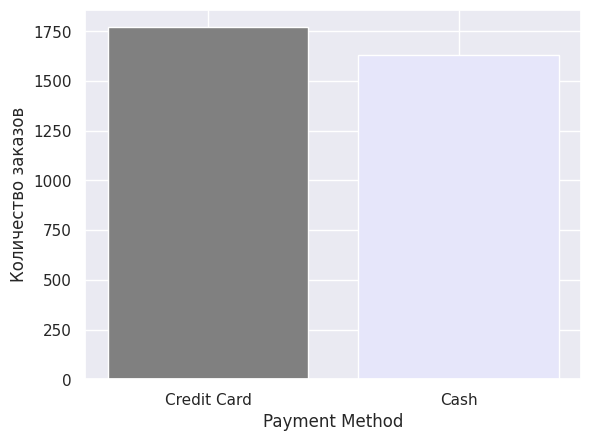

In [8]:
x = "Payment Method"
y1 = data[data[x] == "Credit Card"].shape[0]
y2 = data[data[x] == "Cash"].shape[0]

plt.bar(["Credit Card", "Cash"], [y1, y2], color=['grey', 'lavender'])
plt.xlabel("Payment Method")
plt.ylabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–∫–∞–∑–æ–≤")
plt.show()

__________________________________________________________________

–ü—Ä–æ–≤–µ–¥–µ–º —Ä–∞—Å—á–µ—Ç **RFM-–∞–Ω–∞–ª–∏–∑–∞** –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ –ø–æ–≤–µ–¥–µ–Ω–∏—è –∫–ª–∏–µ–Ω—Ç–æ–≤ –Ω–∞ –æ—Å–Ω–æ–≤–µ —Ç—Ä–µ—Ö –∫–ª—é—á–µ–≤—ã—Ö –º–µ—Ç—Ä–∏–∫:

‚úÖ 1.   *—á–∞—Å—Ç–æ—Ç—ã –ø–æ–∫—É–ø–æ–∫ (Frequency)*

‚úÖ 2.   *–ø–æ—Å–ª–µ–¥–Ω–µ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ (Recency)*

‚úÖ 3.   *–ø–ª–∞—Ç–µ–∂–µ—Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç–∏ (Monetary)*

–û–±—ä–µ–¥–∏–Ω–∏–º –≤—Å–µ —Ç—Ä–∏ –º–µ—Ç—Ä–∏–∫–∏ –≤ –æ–±—â–∏–π DataFrame rfm_df –ø—É—Ç–µ–º —Å–ª–∏—è–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö. –ö–ª—é—á 'Customer Reference ID'.–í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ –º—ã –ø–æ–ª—É–º–∏–ª–∏ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ —á–∞—Å—Ç–æ—Ç–µ, –ø–æ—Å–ª–µ–¥–Ω–µ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –∏ –ø–ª–∞—Ç–µ–∂–µ—Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç–∏ –∫–∞–∂–¥–æ–≥–æ –∫–ª–∏–µ–Ω—Ç–∞.

In [9]:
# —á–∞—Å—Ç–æ—Ç–∞ –ø–æ–∫—É–ø–æ–∫ (Frequency)
frequency = df_copy.groupby('Customer Reference ID')['Item Purchased'].count() # –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∞ DataFrame df_copy –ø–æ —Å—Ç–æ–ª–±—Ü—É
                          #'Customer Reference ID' –∏ –ø–æ–¥—Å—á–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ —Å—Ç–æ–ª–±—Ü–µ 'Item Purchased'
frequency = frequency.reset_index() # —Å–±—Ä–∞—Å—ã–≤–∞–µ–º –∏–Ω–¥–µ–∫—Å—ã –∏ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤—ã–≤–∞–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç –≤ —Ñ–æ—Ä–º–∞—Ç DataFrame

print(frequency)

     Customer Reference ID  Item Purchased
0                        0              14
1                        1              20
2                        2              22
3                        3              18
4                        4              22
..                     ...             ...
161                    161              22
162                    162              16
163                    163              19
164                    164              18
165                    165              32

[166 rows x 2 columns]


In [10]:
# –ø–æ—Å–ª–µ–¥–Ω—è—è –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å (Recency)

df_copy["Time difference"] = max(df_copy["Date Purchase"]) - df_copy["Date Purchase"] # –∏–∑ —Ç–µ–∫—É—â–µ–π –¥–∞—Ç—ã –≤—ã—á–∏—Ç–∞–µ–º –¥–∞—Ç—É –ø–æ—Å–ª–µ–¥–Ω–µ–π –ø–æ–∫—É–ø–∫–∏
recency = df_copy.groupby('Customer Reference ID')['Time difference'].min()
recency = recency.reset_index()
recency['Time difference'] = recency['Time difference'].dt.days # –ó–¥–µ—Å—å –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ—Ç—Å—è —Ñ–æ—Ä–º–∞—Ç –≤—Ä–µ–º–µ–Ω–∏ –≤ –¥–Ω–∏ –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞

print(recency)

     Customer Reference ID  Time difference
0                        0               85
1                        1               17
2                        2               28
3                        3               17
4                        4               33
..                     ...              ...
161                    161                7
162                    162                7
163                    163                1
164                    164               63
165                    165                2

[166 rows x 2 columns]


In [11]:
# –ø–ª–∞—Ç–µ–∂–µ—Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å (Monetary)

monetary = df_copy.groupby('Customer Reference ID')['Purchase Amount (USD)'].sum()
monetary = monetary.reset_index()

print(monetary)

     Customer Reference ID  Purchase Amount (USD)
0                        0                 1480.0
1                        1                 1664.0
2                        2                 2377.0
3                        3                 1764.0
4                        4                 2361.0
..                     ...                    ...
161                    161                 2229.0
162                    162                 1687.0
163                    163                 2191.0
164                    164                 2145.0
165                    165                 6092.0

[166 rows x 2 columns]


In [12]:
rfm_df = pd.merge(frequency, recency, on="Customer Reference ID", how="inner")
rfm_df = pd.merge(rfm_df, monetary, on="Customer Reference ID", how="inner")
# –æ—Å—Ç–∞–≤–ª—è–µ–∏ —Ç–æ–ª—å–∫–æ —Ç–µ —Å—Ç—Ä–æ–∫–∏, –≥–¥–µ –∑–Ω–∞—á–µ–Ω–∏—è —ç—Ç–æ–≥–æ —Å—Ç–æ–ª–±—Ü–∞ –µ—Å—Ç—å –∫–∞–∫ –≤ –ø–µ—Ä–≤–æ–º, —Ç–∞–∫ –∏ –≤–æ –≤—Ç–æ—Ä–æ–º Df
print(rfm_df)

     Customer Reference ID  Item Purchased  Time difference  \
0                        0              14               85   
1                        1              20               17   
2                        2              22               28   
3                        3              18               17   
4                        4              22               33   
..                     ...             ...              ...   
161                    161              22                7   
162                    162              16                7   
163                    163              19                1   
164                    164              18               63   
165                    165              32                2   

     Purchase Amount (USD)  
0                   1480.0  
1                   1664.0  
2                   2377.0  
3                   1764.0  
4                   2361.0  
..                     ...  
161                 2229.0  
162        

In [36]:
df

NameError: name 'df' is not defined

In [35]:
rfm_df

Customer Reference ID  Item Purchased  Time difference  \
0                        0              14               85   
1                        1              20               17   
2                        2              22               28   
3                        3              18               17   
4                        4              22               33   
..                     ...             ...              ...   
161                    161              22                7   
162                    162              16                7   
163                    163              19                1   
164                    164              18               63   
165                    165              32                2   

     Purchase Amount (USD)  
0                   1480.0  
1                   1664.0  
2                   2377.0  
3                   1764.0  
4                   2361.0  
..                     ...  
161                 2229.0  
162                 1687.0  
163                 2191.0  
164                 2145.0  
165                 6092.0  

[166 rows x 4 columns]

------------------------------------------------------


‚ö°  –ú–∞—à—Ç–∞–±–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ  ‚ö°

In [13]:
scaler_standard = StandardScaler()
rfm_std = scaler_standard.fit_transform(rfm_df[['Item Purchased', 'Time difference', 'Purchase Amount (USD)']])

scaler_minmax = MinMaxScaler()
rfm_norm = scaler_minmax.fit_transform(rfm_df[['Item Purchased', 'Time difference', 'Purchase Amount (USD)']])


In [14]:
# –°–æ–∑–¥–∞—ë–º –Ω–æ–≤—ã–µ DataFrame —Å –æ—Ç–º–∞—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏
rfm_std_df = pd.DataFrame(rfm_std, columns=['Item Purchased_std', 'Time difference_std', 'Purchase Amount (USD)_std'])
rfm_norm_df = pd.DataFrame(rfm_norm, columns=['Item Purchased_norm', 'Time difference_norm', 'Purchase Amount (USD)_norm'])

# –î–æ–±–∞–≤–ª—è–µ–º Customer Reference ID –æ–±—Ä–∞—Ç–Ω–æ –∫ –Ω–æ–≤—ã–º DataFrame
rfm_std_df['Customer Reference ID'] = rfm_df['Customer Reference ID']
rfm_norm_df['Customer Reference ID'] = rfm_df['Customer Reference ID']

# –í—ã–≤–æ–¥ –Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞–Ω–Ω—ã—Ö –∏ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
print("–°—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–æ–≤–∞–Ω–Ω—ã–π DataFrame:")
print(rfm_std_df)

print("–ù–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞–Ω–Ω—ã–π DataFrame:")
print(rfm_norm_df)

–°—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–æ–≤–∞–Ω–Ω—ã–π DataFrame:
     Item Purchased_std  Time difference_std  Purchase Amount (USD)_std  \
0             -1.485774             3.421323                  -0.861438   
1             -0.110466            -0.089257                  -0.758967   
2              0.347969             0.478631                  -0.361890   
3             -0.568902            -0.089257                  -0.703276   
4              0.347969             0.736762                  -0.370801   
..                  ...                  ...                        ...   
161            0.347969            -0.605519                  -0.444313   
162           -1.027338            -0.605519                  -0.746158   
163           -0.339684            -0.915276                  -0.465476   
164           -0.568902             2.285547                  -0.491093   
165            2.640149            -0.863650                   1.707028   

     Customer Reference ID  
0                       

--------------------------------------------------

–ü—Ä–æ–≤–µ–¥–µ–º –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö:
*   –ü–æ—Å—Ç—Ä–æ–∏–º –º–∞—Ç—Ä–∏—Ü—É –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏  ‚≠ê
*   –ü–æ—Å—Ç—Ä–æ–∏–º heatmap –¥–ª—è –º–∞—Ç—Ä–∏—Ü—ã –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏  ‚≠ê
*   –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–∞—Ç—Ä–∏—Ü—ã –≤—ã–±—Ä–æ—Å–æ–≤  ‚≠ê


–ú–∞—Ç—Ä–∏—Ü–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏:
                           Item Purchased_std  Time difference_std  \
Item Purchased_std                   1.000000            -0.278826   
Time difference_std                 -0.278826             1.000000   
Purchase Amount (USD)_std            0.381808            -0.112542   

                           Purchase Amount (USD)_std  
Item Purchased_std                          0.381808  
Time difference_std                        -0.112542  
Purchase Amount (USD)_std                   1.000000  


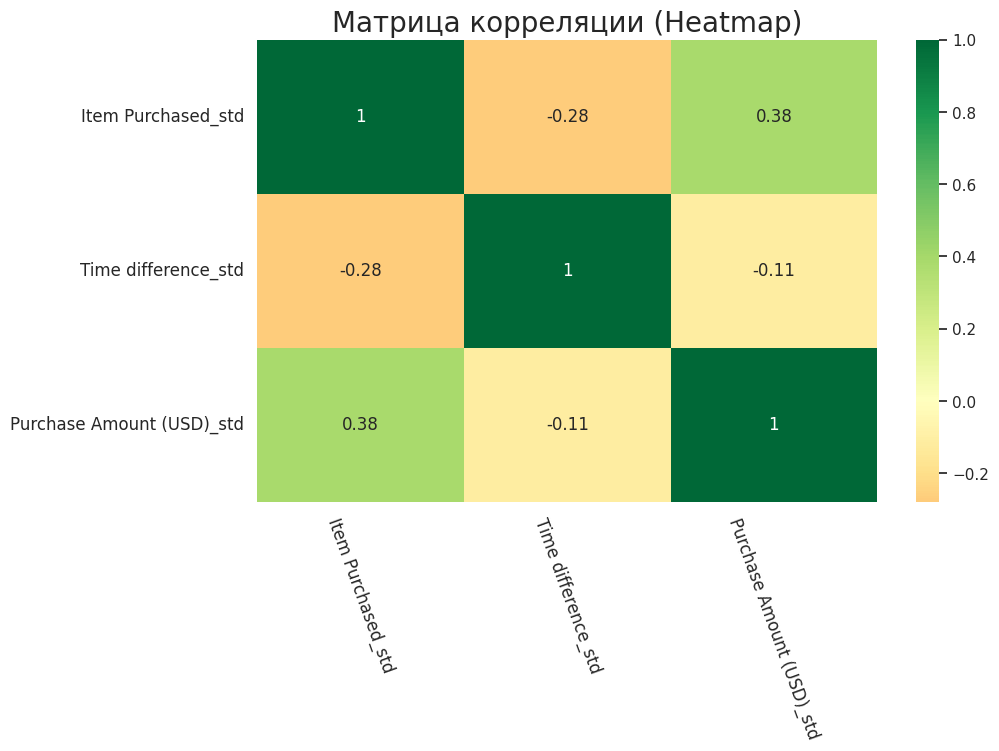

In [19]:
# –ú–∞—Ç—Ä–∏—Ü–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏
correlation_matrix = rfm_std_df.corr()
print("–ú–∞—Ç—Ä–∏—Ü–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏:")
print(correlation_matrix)

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ heatmap –¥–ª—è –º–∞—Ç—Ä–∏—Ü—ã –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏
plt.figure(figsize=(10, 6))
sns.heatmap(rfm_std_df.corr(), xticklabels = rfm_std_df.corr().columns,
            yticklabels = rfm_std_df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('–ú–∞—Ç—Ä–∏—Ü–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ (Heatmap)', fontsize=20)
plt.xticks(fontsize=12, rotation=-70)
plt.yticks(fontsize=12)
plt.show()

In [22]:
rfm_std_df.drop(columns=['Customer Reference ID'], inplace=True)

plt.figure(figsize=(10, 6))
sns.heatmap(rfm_std_df.corr(), xticklabels=rfm_std_df.corr().columns,
            yticklabels=rfm_std_df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('–ú–∞—Ç—Ä–∏—Ü–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ (Heatmap)', fontsize=20)
plt.xticks(fontsize=12, rotation=-70)
plt.yticks(fontsize=12)
plt.show()

KeyError: "['Customer Reference ID'] not found in axis"

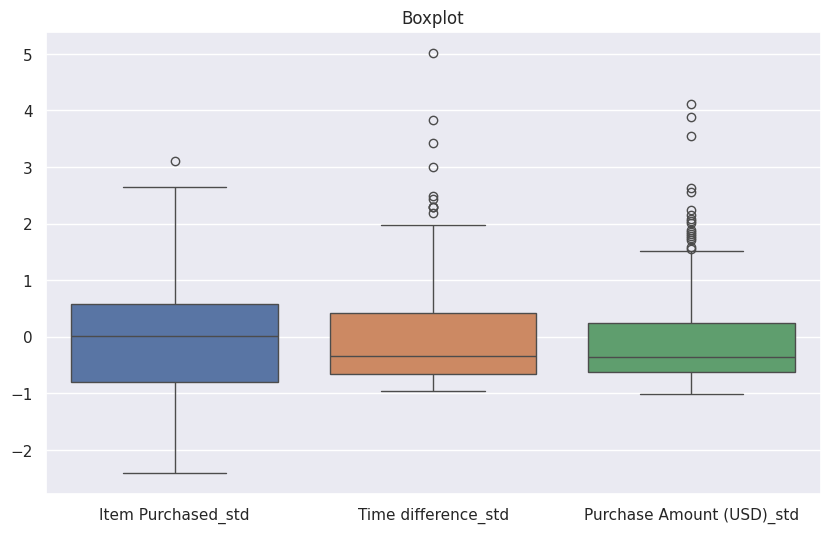

In [34]:
# –ú–∞—Ç—Ä–∏—Ü–∞ –≤—ã–±—Ä–æ—Å–æ–≤
plt.figure(figsize=(10, 6))
sns.boxplot(data=rfm_std_df[['Item Purchased_std', 'Time difference_std', 'Purchase Amount (USD)_std']])
plt.title('Boxplot')
plt.show()

–ú–æ–∂–µ–º –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ –≤—ã–±—Ä–æ—Å–æ–≤ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –º–Ω–æ–≥–æ, –Ω–æ –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –µ–¥–ª–∏–Ω–∏—á–Ω—ã–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è —Å–∏–ª—å–Ω–æ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è –æ—Ç –¥—Ä—É–≥–∏—Ö, —Å–¥–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ –æ—Ç –Ω–∏—Ö –º–æ–∂–Ω–æ –∏–∑–±–∞–≤–∏—Ç—å—Å—è ‚ùó  :

 Z-–æ—Ü–µ–Ω–∫–∞ - —ç—Ç–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã—Ö –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–π. –í—Å–µ –∑–Ω–∞—á–µ–Ω–∏—è, –Ω–∞—Ö–æ–¥—è—â–∏–µ—Å—è –∑–∞ –ø—Ä–µ–¥–µ–ª–∞–º–∏ —ç—Ç–æ–≥–æ –¥–∏–∞–ø–∞–∑–æ–Ω–∞, –±—É–¥—É—Ç —Å—á–∏—Ç–∞—Ç—å—Å—è –≤—ã–±—Ä–æ—Å–∞–º–∏ –∏ —É–¥–∞–ª—è—Ç—å—Å—è –∏–∑ –¥–∞–Ω–Ω—ã—Ö.

In [24]:
# from scipy import stats

# # –§—É–Ω–∫—Ü–∏—è –¥–ª—è —É–¥–∞–ª–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤
# def remove_outliers_zscore(df, threshold=3):
#     return df[(np.abs(stats.zscore(df)) < threshold).all(axis=1)]

# df_cleaned = remove_outliers_zscore(df[['Item Purchased_std', 'Time difference_std', 'Purchase Amount (USD)_std']])


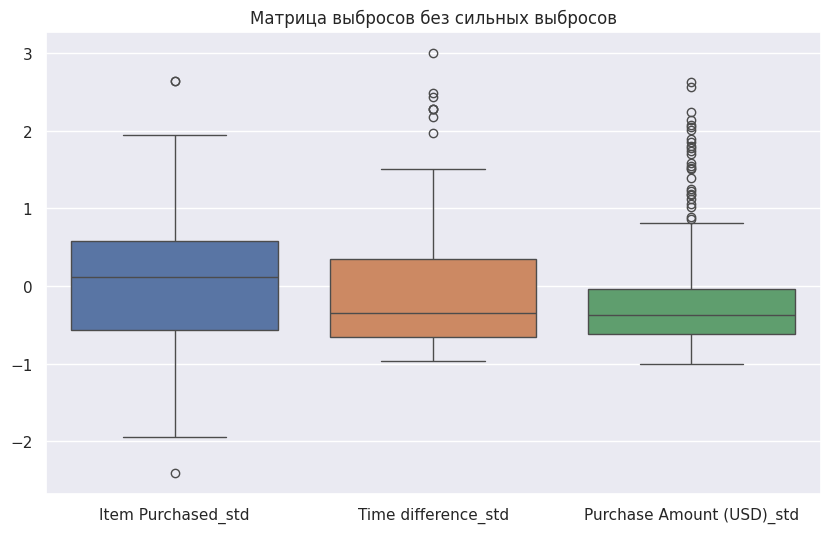

In [25]:
def remove_outliers(df, columns, z_thresh=3):
    for col in columns:
        mean = df[col].mean()
        std = df[col].std() # —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ
        # z_thresh - –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç, –∫–æ—Ç–æ—Ä—ã–π –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç, —Å–∫–æ–ª—å–∫–æ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã—Ö –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–π –æ—Ç —Å—Ä–µ–¥–Ω–µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –Ω—É–∂–Ω–æ –≤–∑—è—Ç—å –¥–ª—è —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏.
        df = df[(df[col] >= mean - z_thresh * std) & (df[col] <= mean + z_thresh * std)]
    return df

# –ö–æ–ª–æ–Ω–∫–∏, –∏–∑ –∫–æ—Ç–æ—Ä—ã—Ö —É–±–∏—Ä–∞–µ–º –≤—ã–±—Ä–æ—Å—ã
cols_to_check = ['Item Purchased_std', 'Time difference_std', 'Purchase Amount (USD)_std']
rfm_std_ = remove_outliers(rfm_std_df, cols_to_check)

# –ú–∞—Ç—Ä–∏—Ü–∞ –≤—ã–±—Ä–æ—Å–æ–≤ –±–µ–∑ –ñ–ï–°–¢–ö–ò–• –≤—ã–±—Ä–æ—Å–æ–≤
plt.figure(figsize=(10, 6))
sns.boxplot(data=rfm_std_[cols_to_check])
plt.title('–ú–∞—Ç—Ä–∏—Ü–∞ –≤—ã–±—Ä–æ—Å–æ–≤ –±–µ–∑ —Å–∏–ª—å–Ω—ã—Ö –≤—ã–±—Ä–æ—Å–æ–≤')
plt.show()

–¢–µ–ø–µ—Ä—å –Ω–µ–∫–æ—Ç–æ—Ä–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –∞–Ω–æ–º–∞–ª—å–Ω—ã—Ö –≤—ã–±—Ä–æ—Å–æ–≤ –±—ã–ª–æ —É–¥–∞–ª–µ–Ω–æ, –∞ –∑–Ω–∞—á–∏—Ç –º–æ–¥–µ–ª—å —Ä–∞–±–æ—Ç–∞–µ—Ç –ª—É—á—à–µ)

--------------------------------------------------------

–†–µ–∞–ª–∏–∑–∞—Ü–∏—è –∞–ª–≥–æ—Ä–∏—Ç–º–∞ ***k-means***.

üìú –ü–æ–∫–∞–∂–µ–º –ø—Ä–æ—Ü–µ—Å—Å –ø–æ–¥–±–æ—Ä–∞ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ —á–∏—Å–ª–∞ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ —Å –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–µ–π –≤—Å–µ—Ö –≥—Ä–∞—Ñ–∏–∫–æ–≤ üìú

In [65]:
# –°–æ–∑–¥–∞–Ω–∏–µ —Å–ø–∏—Å–∫–∞ –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –∑–Ω–∞—á–µ–Ω–∏–π –∏–Ω–µ—Ä—Ü–∏–∏
inertia = []

# —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ–º –∏–Ω–µ—Ä—Ü–∏—é –¥–ª—è –∫–∞–∂–¥–æ–≥–æ
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_std_[['Item Purchased_std', 'Time difference_std', 'Purchase Amount (USD)_std']])
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

–û–ø—Ä–µ–¥–µ–ª–∏–º –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –ª–æ–≥–∏—á–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ —Å –ø–æ–º–æ—â—å—é –º–µ—Ç–æ–¥–∞ –ª–æ–∫—Ç—è

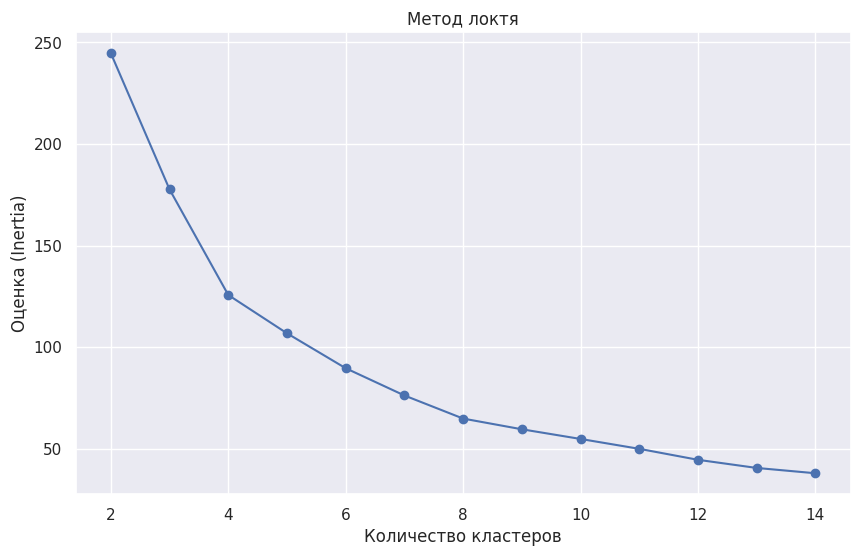

In [66]:
# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞ –º–µ—Ç–æ–¥–∞ "Elbow"
plt.figure(figsize=(10, 6))
plt.plot(range(2, 15), inertia, marker='o')
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤')
plt.ylabel('–û—Ü–µ–Ω–∫–∞ (Inertia)')
plt.title('–ú–µ—Ç–æ–¥ –ª–æ–∫—Ç—è')
plt.grid(True)
plt.show()

–ü–æ –¥–∞–Ω–Ω–æ–π –¥–∏–∞–≥—Ä–∞–º–º–µ –º—ã –≤–∏–¥–∏–º, —á—Ç–æ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –±—É–¥–µ—Ç —Ä–∞–≤–Ω–æ 4...

–°–æ–∑–¥–∞–Ω–∏–µ –¥–∏–∞–≥—Ä–∞–º–º—ã —Ä–∞—Å—Å–µ—è–Ω–∏—è –¥–ª—è –¥–∞–Ω–Ω—ã—Ö

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, The average silhouette_score is : 0.35878675398737264


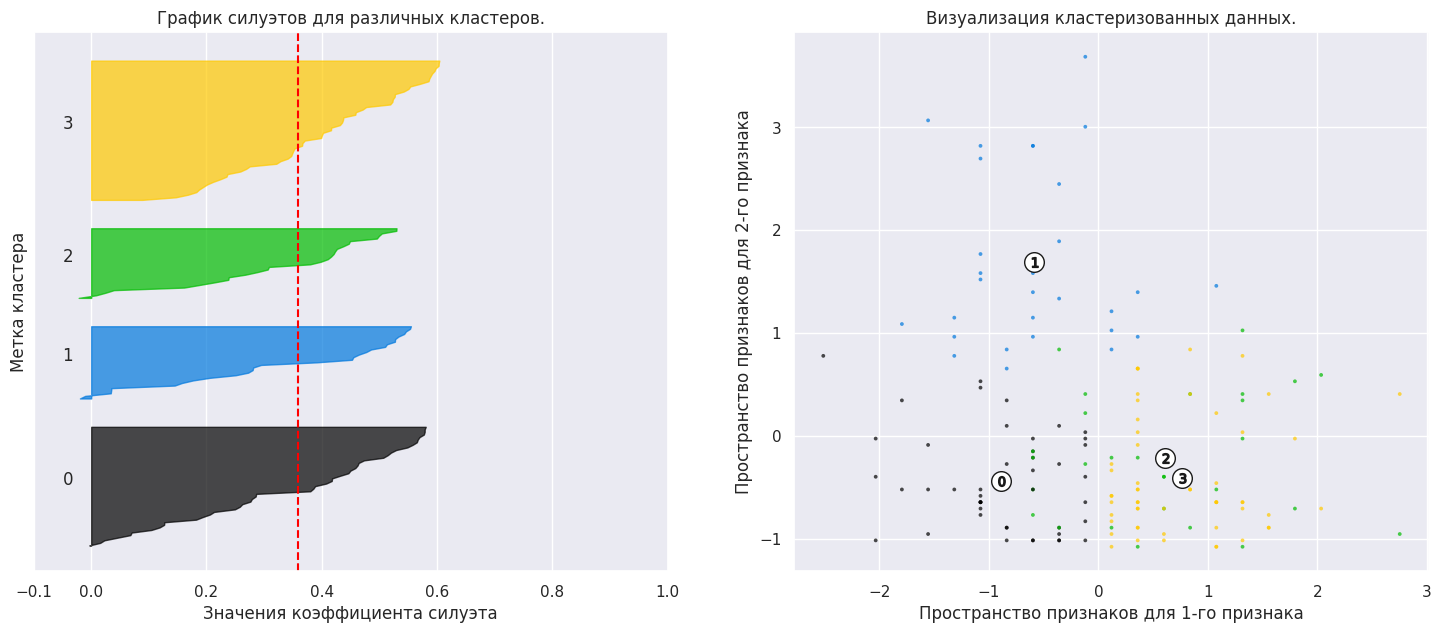

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, The average silhouette_score is : 0.3601005871831813


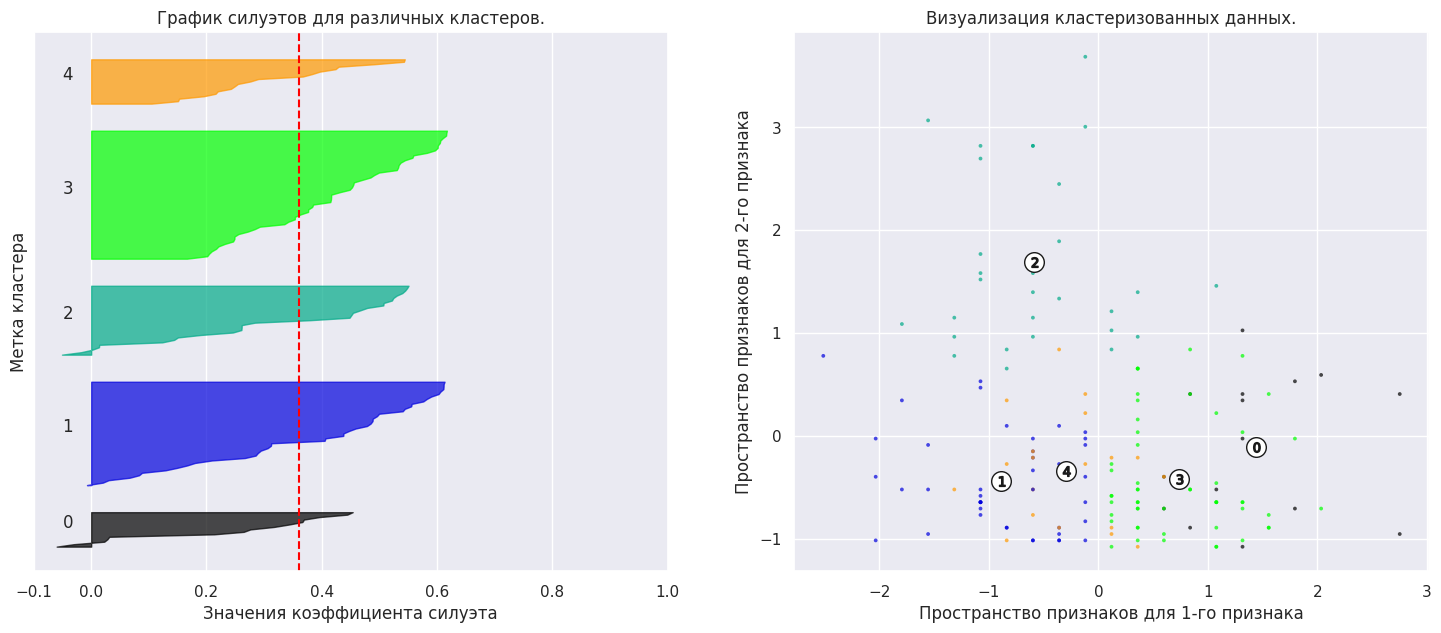

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, The average silhouette_score is : 0.3616083984939525


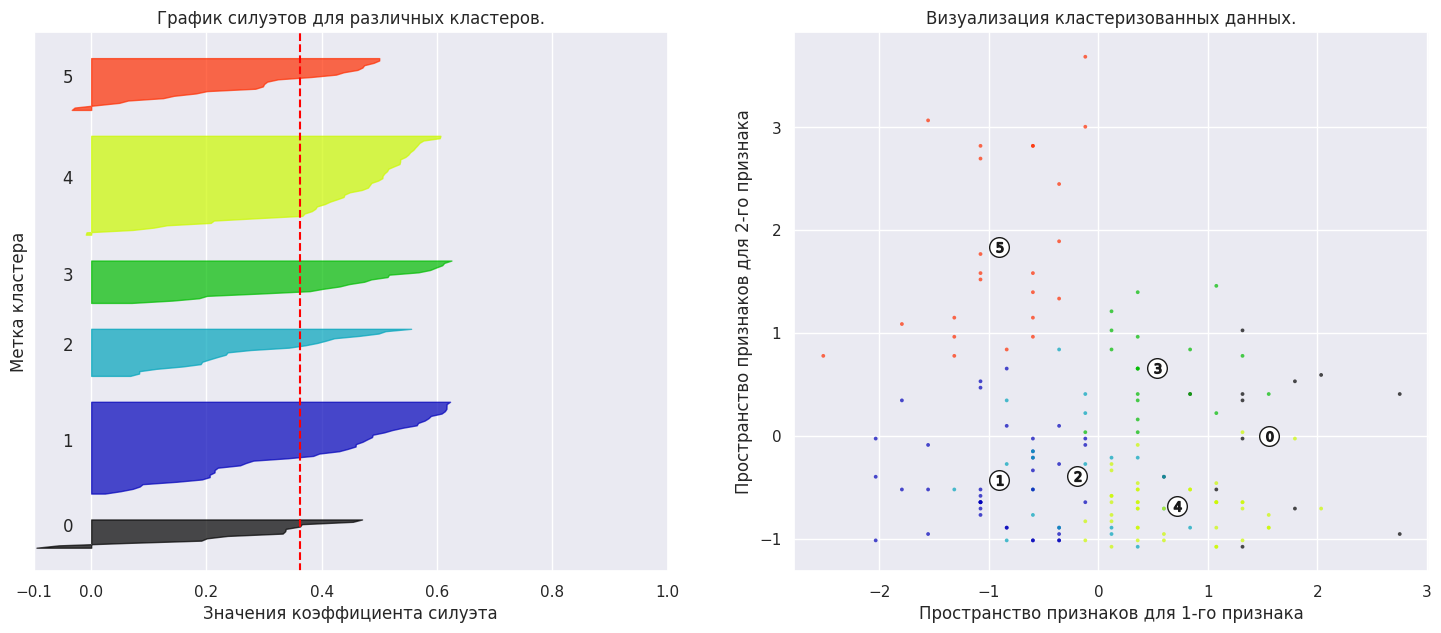

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, The average silhouette_score is : 0.3437164819029168


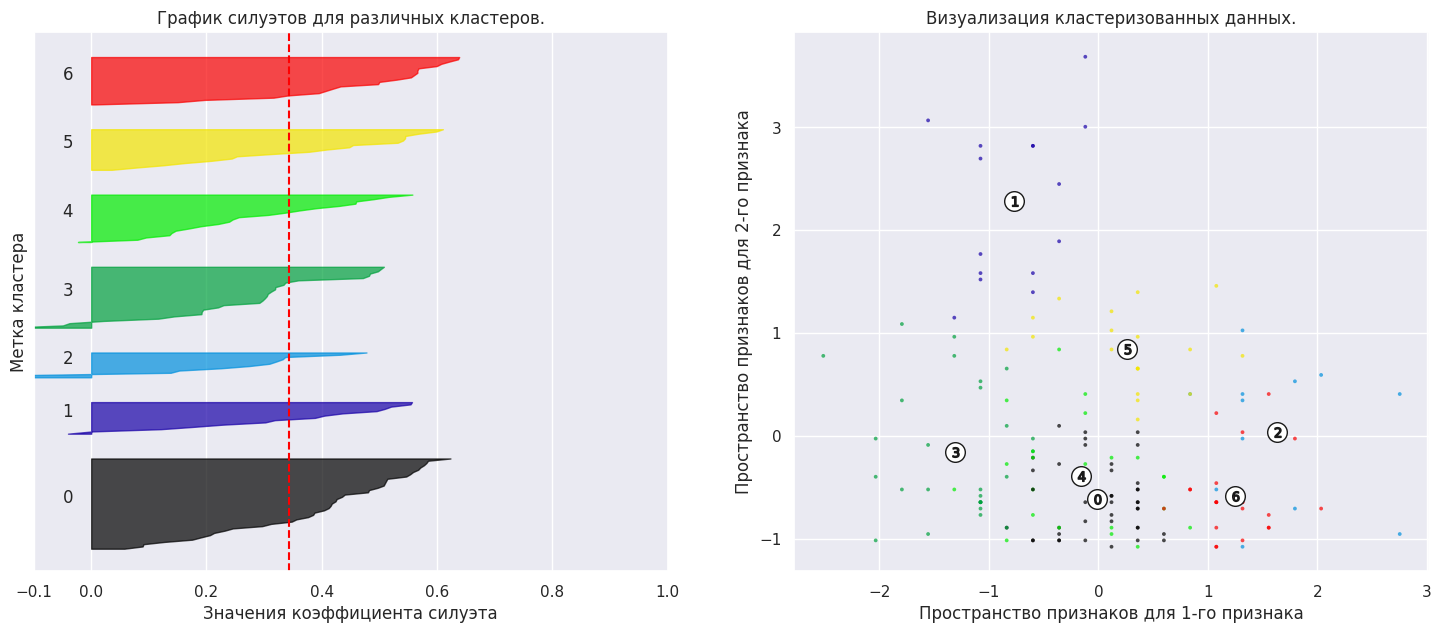

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, The average silhouette_score is : 0.3672128662045975


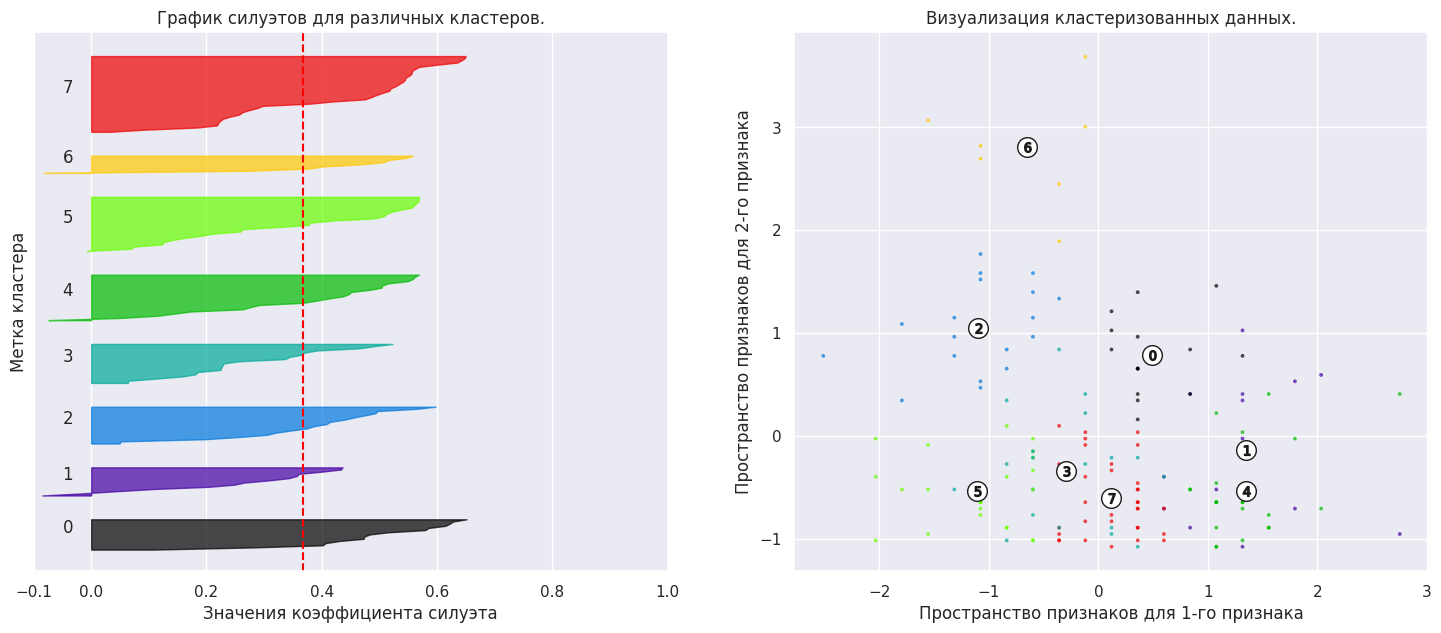

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, The average silhouette_score is : 0.3677571830632144


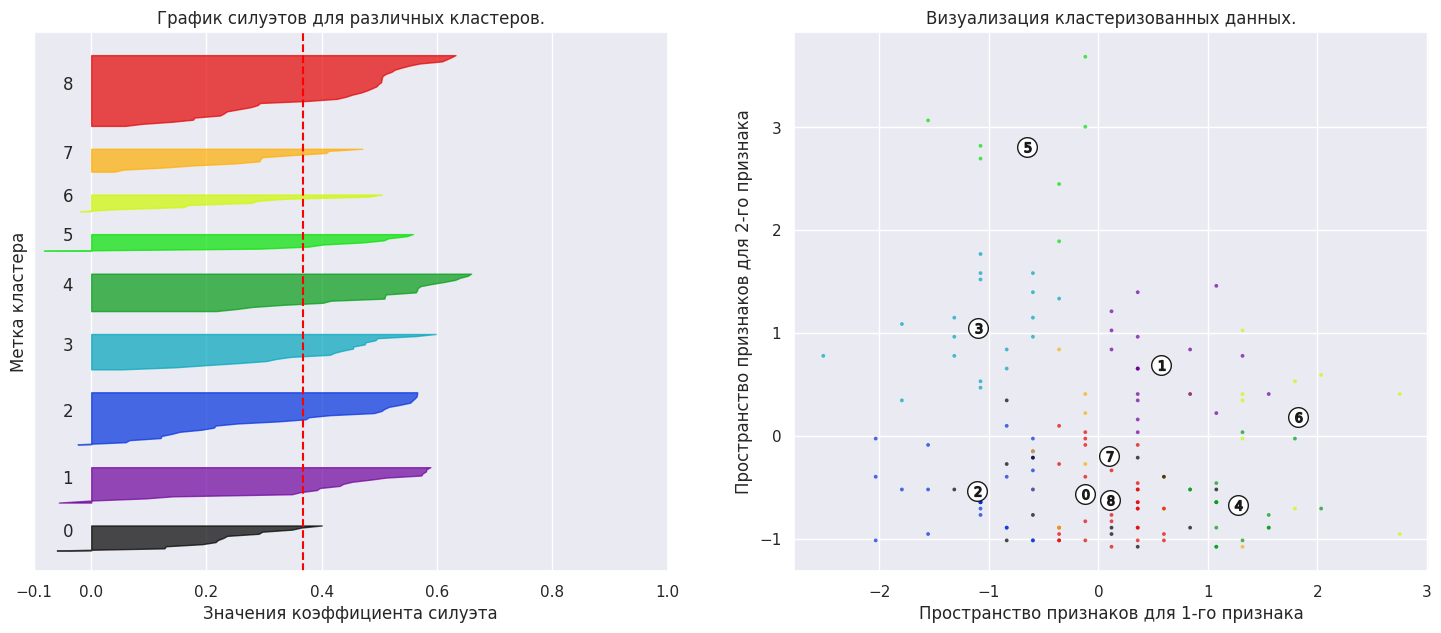

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10, The average silhouette_score is : 0.3754006982727298


In [64]:
# –ü–æ–¥–≥–æ—Ç–æ–≤–∏–º –¥–∞–Ω–Ω—ã–µ
cols_to_check = ['Item Purchased_std', 'Time difference_std', 'Purchase Amount (USD)_std']

# –£–±–µ–¥–∏–º—Å—è, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω—ã
scaler = StandardScaler()
X = scaler.fit_transform(rfm_std_[cols_to_check])

range_n_clusters = [4, 5, 6, 7, 8, 9, 10]
for n_clusters in range_n_clusters:
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  # –ì—Ä–∞—Ñ–∏–∫ —Å–∏–ª—É—ç—Ç–æ–≤. –£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞—é—Ç—Å—è –ø—Ä–µ–¥–µ–ª—ã –¥–ª—è –æ—Å–µ–π –≥—Ä–∞—Ñ–∏–∫–∞ —Å–∏–ª—É—ç—Ç–æ–≤
  ax1.set_xlim([-0.1, 1])
  ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(X)
  # –ú–µ—Ç–æ–¥ fit_predict –æ–¥–Ω–æ–≤—Ä–µ–º–µ–Ω–Ω–æ –æ–±—É—á–∞–µ—Ç –º–æ–¥–µ–ª—å –∏ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –º–µ—Ç–∫–∏ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ (cluster_labels) –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –æ–±—Ä–∞–∑—Ü–∞ –¥–∞–Ω–Ω—ã—Ö.


  silhouette_avg = silhouette_score(X, cluster_labels) # –≤—ã—á–∏—Å–ª—è–µ—Ç —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Å–∏–ª—É—ç—Ç–∞ –¥–ª—è –≤—Å–µ—Ö –æ–±—Ä–∞–∑—Ü–æ–≤
  print(f"For n_clusters = {n_clusters}, The average silhouette_score is : {silhouette_avg}")

  # –í—ã—á–∏—Å–ª–µ–Ω–∏–µ –∏–Ω–¥–∏–≤–∏–¥—É–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π —Å–∏–ª—É—ç—Ç–æ–≤
  sample_silhouette_values = silhouette_samples(X, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
      ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
      # –ò–∑ –≤—Å–µ—Ö —Å–∏–ª—É—ç—Ç–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤—ã–±–∏—Ä–∞—é—Ç—Å—è —Ç–æ–ª—å–∫–æ —Ç–µ, –∫–æ—Ç–æ—Ä—ã–µ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–∞—Ç —Ç–µ–∫—É—â–µ–º—É –∫–ª–∞—Å—Ç–µ—Ä—É
      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      # –∫–æ–ª —Ç–æ—á–µ–∫ –¥–∞–Ω–Ω—ã—Ö –≤ —ç—Ç–æ–º –∫–ª–∞—Å—Ç–µ—Ä–µ
      y_upper = y_lower + size_cluster_i # –†–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ—Ç—Å—è –≤–µ—Ä—Ö–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞

      color = cm.nipy_spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)
      # –¶–≤–µ—Ç –≤—ã–±–∏—Ä–∞–µ—Ç—Å—è –ø—Ä–æ–ø–æ—Ä—Ü–∏–æ–Ω–∞–ª—å–Ω–æ –Ω–æ–º–µ—Ä—É –∫–ª–∞—Å—Ç–µ—Ä–∞
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      y_lower = y_upper + 10

  ax1.set_title("–ì—Ä–∞—Ñ–∏–∫ —Å–∏–ª—É—ç—Ç–æ–≤ –¥–ª—è —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –∫–ª–∞—Å—Ç–µ—Ä–æ–≤.")
  ax1.set_xlabel("–ó–Ω–∞—á–µ–Ω–∏—è –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ —Å–∏–ª—É—ç—Ç–∞")
  ax1.set_ylabel("–ú–µ—Ç–∫–∞ –∫–ª–∞—Å—Ç–µ—Ä–∞")

  # –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
  # –î–æ–±–∞–≤–ª—è–µ—Ç—Å—è –≤–µ—Ä—Ç–∏–∫–∞–ª—å–Ω–∞—è –ø—É–Ω–∫—Ç–∏—Ä–Ω–∞—è –ª–∏–Ω–∏—è

  ax1.set_yticks([])
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
  # –ù–æ—Ä–º–∞–ª–∏–∑—É–µ–º –º–µ—Ç–∫–∏ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –ø—É—Ç–µ–º –¥–µ–ª–µ–Ω–∏—è –Ω–∞ –æ–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ n_clusters. –≠—Ç–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ, —á—Ç–æ–±—ã —Å–æ–∑–¥–∞—Ç—å –º–∞—Å—Å–∏–≤ –∑–Ω–∞—á–µ–Ω–∏–π –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ 0-1
  # –∫–æ—Ç–æ—Ä—ã–π –ø–æ—Ç–æ–º –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è —Ü–≤–µ—Ç–æ–≤.
  ax2.scatter(X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

  centers = clusterer.cluster_centers_

  ax2.scatter(centers[:, 0], centers[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k")
  # –û—Ç–æ–±—Ä–∞–∂–∞—é—Ç—Å—è —Ü–µ–Ω—Ç—Ä—ã –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –≤ –≤–∏–¥–µ –±–µ–ª—ã—Ö –∫—Ä—É–≥–æ–≤ —Å —á—ë—Ä–Ω–æ–π –æ–∫–∞–Ω—Ç–æ–≤–∫–æ–π.

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker=f"${i}$", alpha=1, s=50, edgecolor="k")

  ax2.set_title("–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö.")
  ax2.set_xlabel("–ü—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è 1-–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞")
  ax2.set_ylabel("–ü—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è 2-–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞")

  plt.show()

1.   –ì—Ä–∞—Ñ–∏–∫ "Silhouette Plot for the Various Clusters" (–°–∏–ª—É—ç—Ç–Ω—ã–µ –¥–∏–∞–≥—Ä–∞–º–º—ã)

–°–∏–ª—É—ç—Ç–Ω—ã–π –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∏–∑–º–µ—Ä—è–µ—Ç –∫–∞–∫ –±–ª–∏–∑–∫–æ –∫–∞–∂–¥—ã–π –æ–±—ä–µ–∫—Ç –≤ –∫–ª–∞—Å—Ç–µ—Ä–µ –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –∫ –æ–±—ä–µ–∫—Ç–∞–º –∏–∑ —Å–æ—Å–µ–¥–Ω–∏—Ö –∫–ª–∞—Å—Ç–µ—Ä–æ–≤. –ó–Ω–∞—á–µ–Ω–∏–µ –∏–∑–º–µ–Ω—è–µ—Ç—Å—è –æ—Ç -1 –¥–æ 1. –ß–µ–º –±–ª–∏–∂–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫ 1, —Ç–µ–º –ª—É—á—à–µ –æ–±—ä–µ–∫—Ç —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç —Å–≤–æ–µ–º—É –∫–ª–∞—Å—Ç–µ—Ä—É –∏ —Ç–µ–º –¥–∞–ª—å—à–µ –æ–Ω –æ—Ç —Å–æ—Å–µ–¥–Ω–∏—Ö –∫–ª–∞—Å—Ç–µ—Ä–æ–≤.

*   –°—Ä–µ–¥–Ω–∏–π —Å–∏–ª—É—ç—Ç–Ω—ã–π –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–ª—è –≤—Å–µ—Ö –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ ~0.37
*   –ö–ª–∞—Å—Ç–µ—Ä—ã 2 (–∑–µ–ª–µ–Ω—ã–π) –∏ 1 (–≥–æ–ª—É–±–æ–π) –∏–º–µ—é—Ç –Ω–∏–∑–∫–∏–µ —Å–∏–ª—É—ç—Ç–Ω—ã–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –∫–ª–∞—Å—Ç–µ—Ä–∞–º–∏ 3 –∏ 0 (–∂–µ–ª—Ç—ã–π –∏ —á–µ—Ä–Ω—ã–π)

2.   –ì—Ä–∞—Ñ–∏–∫ "The Visualization of the Clustered Data" (–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö –∫–ª–∞—Å—Ç–µ—Ä–æ–≤)

–ö–ª–∞—Å—Ç–µ—Ä—ã 1 –∏ 0 –ª—É—á—à–µ —Ä–∞–∑–¥–µ–ª–µ–Ω—ã –≤ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, —á—Ç–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É–µ—Ç —Å –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–∏–º–∏ —Å–∏–ª—É—ç—Ç–Ω—ã–º–∏ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞–º–∏ –¥–ª—è —ç—Ç–∏—Ö –∫–ª–∞—Å—Ç–µ—Ä–æ–≤.

–ù–µ–∫–æ—Ç–æ—Ä–∞—è —Å—Ç–µ–ø–µ–Ω—å –ø–µ—Ä–µ–∫—Ä—ã—Ç–∏—è –º–µ–∂–¥—É –∫–ª–∞—Å—Ç–µ—Ä–∞–º–∏ 0 –∏ 1, —á—Ç–æ –º–æ–∂–µ—Ç –æ–±—ä—è—Å–Ω—è—Ç—å –∏—Ö –Ω–∏–∑–∫–∏–µ —Å–∏–ª—É—ç—Ç–Ω—ã–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã

‚úÖ –°–æ–∑–¥–∞–¥–∏–º –∏–Ω—Ç–µ—Ä–∞–∫—Ç–∏–≤–Ω—É—é –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—é –ø—Ä–æ—Ü–µ—Å—Å–∞ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ ùêæ-Means ‚úÖ

interactive(children=(IntSlider(value=0, description='frame', max=50), IntSlider(value=8, description='n_clust‚Ä¶

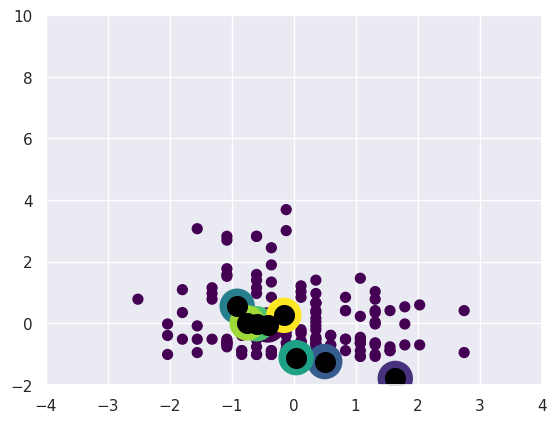

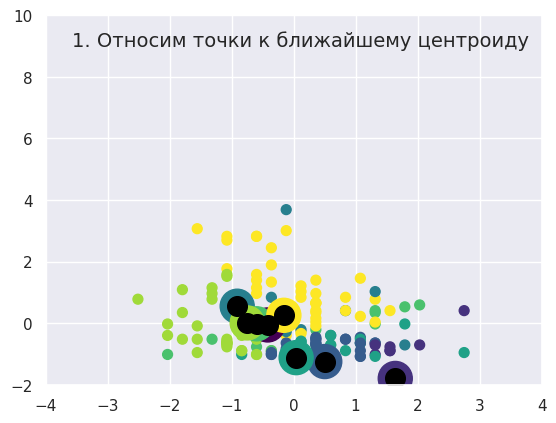

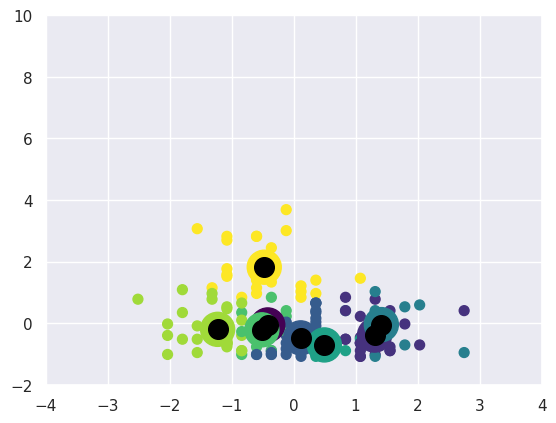

In [52]:
def plot_kmeans_interactive(min_clusters=1, max_clusters=8):
    # –ü–æ–¥–≥–æ—Ç–æ–≤–∏–º –¥–∞–Ω–Ω—ã–µ
    cols_to_check = ['Item Purchased_std', 'Time difference_std', 'Purchase Amount (USD)_std']

    # –£–±–µ–¥–∏–º—Å—è, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω—ã
    scaler = StandardScaler()
    X = scaler.fit_transform(rfm_std_[cols_to_check])

    def plot_points(X, labels, n_clusters):
        plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', vmin=0, vmax=n_clusters - 1)

    def plot_centers(centers):
        plt.scatter(centers[:, 0], centers[:, 1], marker='o', c=np.arange(centers.shape[0]), s=600, cmap='viridis')
        plt.scatter(centers[:, 0], centers[:, 1], marker='o', c='black', s=200)

    def _kmeans_step(frame=0, n_clusters=8):
        rng = np.random.RandomState(2)
        # labels: –û–±–Ω–æ–≤–ª–µ–Ω–∏–µ –º–µ—Ç–æ–∫ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —à–∞–≥–∞.
        #centers: –û–±–Ω–æ–≤–ª–µ–Ω–∏–µ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç —Ü–µ–Ω—Ç—Ä–æ–≤ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤.
        labels = np.zeros(X.shape[0])
        centers = rng.randn(n_clusters, X.shape[1])

        nsteps = frame // 3

        for i in range(nsteps + 1):
            old_centers = centers
            if i < nsteps or frame % 3 > 0:
                labels = pairwise_distances_argmin(X, centers)

            if i < nsteps or frame % 3 > 1:
                centers = np.array([X[labels == j].mean(0) for j in range(n_clusters)])
                nans = np.isnan(centers)
                centers[nans] = old_centers[nans]

        plot_points(X, labels, n_clusters)
        plot_centers(old_centers)

        if frame % 3 == 2:
            for i in range(n_clusters):
                plt.annotate('', centers[i], old_centers[i], arrowprops=dict(arrowstyle='->', linewidth=1))
            plot_centers(centers)

        plt.xlim(-4, 4)
        plt.ylim(-2, 10)

        if frame % 3 == 1:
            plt.text(3.8, 9.5, "1. –û—Ç–Ω–æ—Å–∏–º —Ç–æ—á–∫–∏ –∫ –±–ª–∏–∂–∞–π—à–µ–º—É —Ü–µ–Ω—Ç—Ä–æ–∏–¥—É", ha='right', va='top', size=14)
        elif frame % 3 == 2:
            plt.text(3.8, 9.5, "2. –ú–µ–Ω—è–µ–º —Ü–µ–Ω—Ç—Ä–æ–∏–¥ –Ω–∞ —Å—Ä–µ–¥–Ω–µ–µ", ha='right', va='top', size=14)

    return interactive(_kmeans_step, frame=(0, 50), n_clusters=(min_clusters, max_clusters))

interactive_plot = plot_kmeans_interactive()
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

In [67]:
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(rfm_std_)
Y_pred = kmeans.labels_

print("–ú–µ—Ç–∫–∏ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤, –≤—ã—á–∏—Å–ª–µ–Ω–Ω—ã–µ –∞–ª–≥–æ—Ä–∏—Ç–º–æ–º KMeans:")
print(Y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


–ú–µ—Ç–∫–∏ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤, –≤—ã—á–∏—Å–ª–µ–Ω–Ω—ã–µ –∞–ª–≥–æ—Ä–∏—Ç–º–æ–º KMeans:
[6 7 4 7 6 6 6 4 4 6 0 8 0 1 5 9 2 8 3 4 0 7 2 3 6 4 3 0 2 7 0 6 7 4 0 6 0
 6 1 3 6 6 0 2 9 6 4 6 0 1 0 6 9 4 3 1 8 4 4 2 3 4 4 4 1 7 1 4 1 4 7 0 5 7
 4 7 9 3 4 6 5 5 4 7 6 1 8 1 7 6 5 0 6 1 3 3 6 6 4 6 3 5 6 0 4 0 4 3 9 5 9
 1 6 0 0 9 7 8 3 2 0 9 7 1 7 8 6 1 6 1 1 0 1 6 8 6 3 6 8 9 2 4 0 7 5 2 2 0
 8 6 4 2 4 0 6 4 4 5 9]


–ú–µ—Ç–∫–∏ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ (labels), –∫–æ—Ç–æ—Ä—ã–µ –≤—ã—á–∏—Å–ª—è–µ—Ç –∞–ª–≥–æ—Ä–∏—Ç–º KMeans, –æ–±–æ–∑–Ω–∞—á–∞—é—Ç –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç—å –∫–∞–∂–¥–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞ –∏–∑ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö –∫ –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–º—É –∫–ª–∞—Å—Ç–µ—Ä—É.

-----------------------------------------------------------------

In [32]:
# scaler = StandardScaler()
# X = scaler.fit_transform(rfm_std_df[['Item Purchased_std', 'Time difference_std', 'Purchase Amount (USD)_std']])

# # –í—ã–ø–æ–ª–Ω–∏–º –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—é KMeans —Å —á–∏—Å–ª–æ–º –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ 4
# kmeans = KMeans(n_clusters=4, random_state=0)
# rfm_std_df['cluster'] = kmeans.fit_predict(X)

# # –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏
# plt.figure(figsize=(10, 7))

# # –û—Ç–æ–±—Ä–∞–∂–∞–µ–º —Ç–æ—á–∫–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Ç–µ—Ä–∞
# plt.plot(rfm_std_df[rfm_std_df['cluster'] == 0]['Item Purchased_std'], rfm_std_df[rfm_std_df['cluster'] == 0]['Purchase Amount (USD)_std'], 'bo', label='class1')
# plt.plot(rfm_std_df[rfm_std_df['cluster'] == 1]['Item Purchased_std'], rfm_std_df[rfm_std_df['cluster'] == 1]['Purchase Amount (USD)_std'], 'go', label='class2')
# plt.plot(rfm_std_df[rfm_std_df['cluster'] == 2]['Item Purchased_std'], rfm_std_df[rfm_std_df['cluster'] == 2]['Purchase Amount (USD)_std'], 'ro', label='class3')
# plt.plot(rfm_std_df[rfm_std_df['cluster'] == 3]['Item Purchased_std'], rfm_std_df[rfm_std_df['cluster'] == 3]['Purchase Amount (USD)_std'], 'yo', label='class4')

# plt.xlabel('Item Purchased_std')
# plt.ylabel('Purchase Amount (USD)_std')
# plt.legend(loc=0)
# plt.title('–ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è KMeans')
# plt.show()

---------------------------------------------------------------------------


# ***–ò–µ—Ä–∞—Ä—Ö–∏—á–µ—Å–∫–∞—è –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è*** üìä

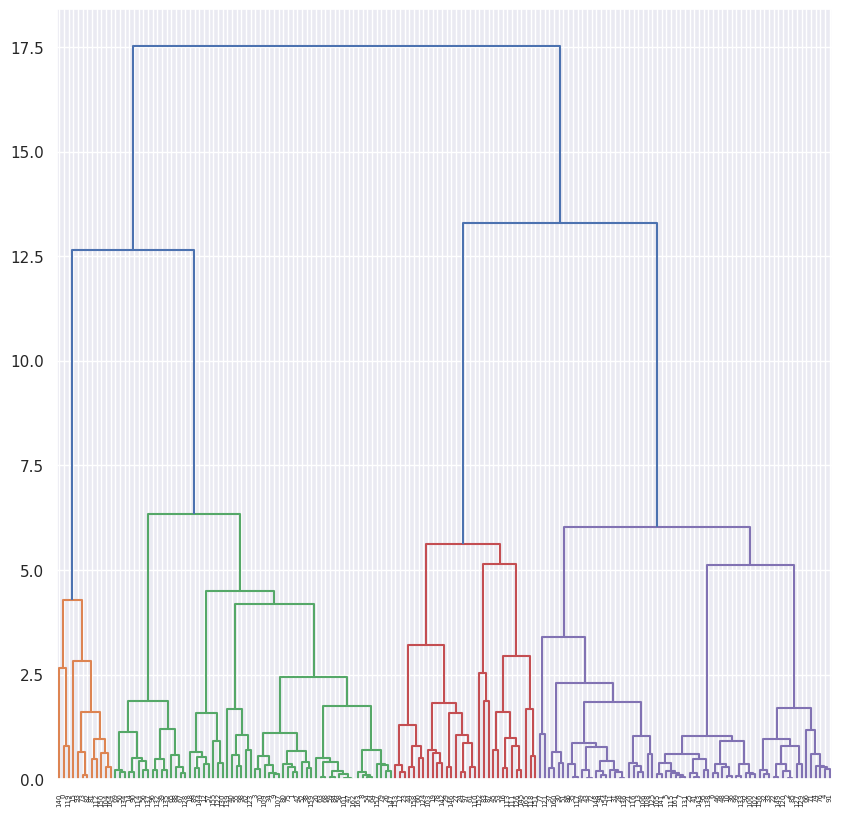

[1 2 3 4]
     Item Purchased_std  Time difference_std  Purchase Amount (USD)_std  \
0             -1.485774             3.421323                  -0.861438   
1             -0.110466            -0.089257                  -0.758967   
2              0.347969             0.478631                  -0.361890   
3             -0.568902            -0.089257                  -0.703276   
4              0.347969             0.736762                  -0.370801   
..                  ...                  ...                        ...   
161            0.347969            -0.605519                  -0.444313   
162           -1.027338            -0.605519                  -0.746158   
163           -0.339684            -0.915276                  -0.465476   
164           -0.568902             2.285547                  -0.491093   
165            2.640149            -0.863650                   1.707028   

     payment_type  pred_sklearn  
0               1             0  
1               2    

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [74]:
Z = linkage(rfm_std_df[['Item Purchased_std', 'Time difference_std', 'Purchase Amount (USD)_std']], method='ward')

fig = plt.figure(figsize=(10, 10))
dn = dendrogram(Z)
plt.show()

# –ò—Å–ø–æ–ª—å–∑—É–µ–º –º–µ—Ç–æ–¥ fcluster –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
y_pred = fcluster(Z, 10, criterion='distance')
print(np.unique(y_pred))

# –î–æ–±–∞–≤–ª—è–µ–º –∫–ª–∞—Å—Ç–µ—Ä–Ω—ã–µ –º–µ—Ç–∫–∏ –≤ DataFrame
rfm_std_df['payment_type'] = y_pred
print(rfm_std_df)

# –ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º AgglomerativeClustering –æ—Ç sklearn
hc = AgglomerativeClustering(n_clusters = 10, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(rfm_std_df[['Item Purchased_std', 'Time difference_std', 'Purchase Amount (USD)_std']])

# –î–æ–±–∞–≤–ª—è–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ –≤ DataFrame
rfm_std_df['pred_sklearn'] = y_hc
print(rfm_std_df)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'blue', 'green', 'yellow', 'grey', 'brown', 'pink', 'purple', 'orange', 'cyan']
labels = range(1, 11)

for color, label in zip(colors, np.unique(y_hc)):
    ax.scatter(rfm_std_df.loc[y_hc == label, 'Item Purchased_std'],
               rfm_std_df.loc[y_hc == label, 'Purchase Amount (USD)_std'],
               rfm_std_df.loc[y_hc == label, 'Time difference_std'],
               s=50, color=color, label=f'Cluster {label}')

ax.set_xlabel('Item Purchased_std')
ax.set_ylabel('Purchase Amount (USD)_std')
ax.set_zlabel('Time difference_std')
ax.legend()
plt.show()


# **–î–µ–¥—Ä–æ–≥—Ä–∞–º–º–∞**

–û—Å—å Y –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç —Å–æ–±–æ–π —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ (–∏–ª–∏ —Ä–∞–∑–ª–∏—á–∏–µ) –º–µ–∂–¥—É –∫–ª–∞—Å—Ç–µ—Ä–∞–º–∏. –ß–µ–º –≤—ã—à–µ –º–µ—Å—Ç–æ —Å–æ–µ–¥–∏–Ω–µ–Ω–∏—è –Ω–∞ –æ—Å–∏ Y, —Ç–µ–º –¥–∞–ª–µ–µ –∫–ª–∞—Å—Ç–µ—Ä—ã —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω—ã –¥—Ä—É–≥ –æ—Ç –¥—Ä—É–≥–∞

–û—Å—å X –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç –∏–Ω–¥–∏–≤–∏–¥—É–∞–ª—å–Ω—ã–µ –æ–±—ä–µ–∫—Ç—ã –∏–ª–∏ –≥—Ä—É–ø–ø—ã –æ–±—ä–µ–∫—Ç–æ–≤.

–ß—Ç–æ–±—ã –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤, –ø—Ä–æ–≤–µ–¥–µ–º –≥–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω—É—é –ª–∏–Ω–∏—é –Ω–∞ —É—Ä–æ–≤–Ω–µ, –≥–¥–µ —É–¥–∞–ª–µ–Ω–∏–µ –æ—Ç –ø—Å–µ–≤–¥–æ—á–ª–µ–Ω–æ–≤ –∫–ª–∞—Å—Ç–µ—Ä–∞ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∏ –∑–Ω–∞—á–∏–º–æ–µ. –í –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ, –º–æ–∂–Ω–æ –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å —á–µ—Ç—ã—Ä–µ –æ—Å–Ω–æ–≤–Ω—ã—Ö –∫–ª–∞—Å—Ç–µ—Ä–∞ (—Å–∏–Ω–∏–π, –∑–µ–ª–µ–Ω—ã–π, –∫—Ä–∞—Å–Ω—ã–π –∏ —Ñ–∏–æ–ª–µ—Ç–æ–≤—ã–π).

–í—ã—Å–æ—Ç–∞, –Ω–∞ –∫–æ—Ç–æ—Ä–æ–π –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤, –≥–æ–≤–æ—Ä–∏—Ç –æ —Ä–∞–∑–ª–∏—á–∏—è—Ö –≤–Ω—É—Ç—Ä–∏ –¥–∞–Ω–Ω—ã—Ö. –ß–µ–º –≤—ã—à–µ –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ, —Ç–µ–º –±–æ–ª–µ–µ —Ä–∞–∑–ª–∏—á–Ω—ã –∫–ª–∞—Å—Ç–µ—Ä—ã.
–û–±—ä–µ–¥–∏–Ω–µ–Ω–Ω—ã–µ –Ω–∏–∑–∫–æ –∫–ª–∞—Å—Ç–µ—Ä—ã –∏–º–µ—é—Ç –±–æ–ª–µ–µ –≤—ã—Å–æ–∫—É—é —Å—Ö–æ–∂–µ—Å—Ç—å –º–µ–∂–¥—É —Å–æ–±–æ–π. –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, —Ç—É—Ç –≤–∏–¥–∏–º, —á—Ç–æ —Å–∏–Ω–∏–π –∫–ª–∞—Å—Ç–µ—Ä –±–æ–ª–µ–µ —Ä–∞–∑–ª–∏—á–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –æ—Ç –æ—Å—Ç–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤